**Business Analytics and Data Visualization**

Prof Jose Mendoza

Chapter 6 - Exercise 29

File: ibm.csv



> Note: This notebook assumes that the file breakfast.csv is located in Google Drive, in a folder named 'Data'. *



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Read data file from the Data folder

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Data/nestegg_r.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,EmployeeID,UsageRate,Recognition,Leader
0,1,0.000,0,0
1,2,0.633,0,0
2,3,0.003,0,0
3,4,0.000,0,0
4,5,0.000,0,0
...,...,...,...,...
102,103,0.482,1,0
103,104,0.538,3,1
104,105,0.740,2,0
105,106,0.232,0,0


In [ ]:
# Describe the dataset
df.describe()

,EmployeeID,UsageRate,Recognition,Leader
count,107.000000,107.000000,107.000000,107.000000
mean,54.000000,0.311262,0.373832,0.056075
std,31.032241,0.316631,0.863553,0.301936
min,1.000000,0.000000,0.000000,0.000000
25%,27.500000,0.033500,0.000000,0.000000
50%,54.000000,0.179000,0.000000,0.000000
75%,80.500000,0.598500,0.000000,0.000000
max,107.000000,0.994000,4.000000,2.000000


In [ ]:
# Remove any missing values
df.dropna(inplace=True)


In [ ]:
# Remove column Employee ID
df = df.drop('EmployeeID', axis=1)
df.head()


,UsageRate,Recognition,Leader
0,0.000,0,0
1,0.633,0,0
2,0.003,0,0
3,0.000,0,0
4,0.000,0,0


**Transforming the data**

Use the StandardScaler function from Sklearn

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-0.98766899, -0.4349368 , -0.18659112],
       [ 1.02091256, -0.4349368 , -0.18659112],
       [-0.97814965, -0.4349368 , -0.18659112],
       [-0.98766899, -0.4349368 , -0.18659112],
       [-0.98766899, -0.4349368 , -0.18659112],
       [-0.89564867, -0.4349368 , -0.18659112],
       [ 0.22446079, -0.4349368 , -0.18659112],
       [ 1.99505874,  0.72851913, -0.18659112],
       [-0.91468735, -0.4349368 , -0.18659112],
       [-0.73381982, -0.4349368 , -0.18659112],
       [-0.14679362, -0.4349368 , -0.18659112],
       [-0.88612932, -0.4349368 , -0.18659112],
       [-0.89247555, -0.4349368 , -0.18659112],
       [ 1.66188171,  0.72851913, -0.18659112],
       [ 1.78563318,  0.72851913, -0.18659112],
       [ 0.46879061, -0.4349368 , -0.18659112],
       [-0.41968148, -0.4349368 , -0.18659112],
       [-0.80680146, -0.4349368 , -0.18659112],
       [-0.39112344, -0.4349368 , -0.18659112],
       [-0.94959162, -0.4349368 , -0.18659112],
       [ 0.37359718, -0.4349368 , -0.186

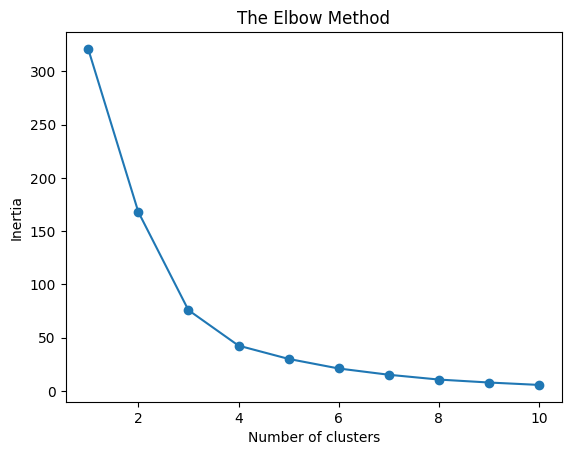

In [ ]:
# Use the Elbow method to find the optimum number of clusters
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on the previous plot, we recommend using k = 3

In [ ]:
# Apply kmeans clustering
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Visualize in a cluster
df['kmeans_3'] = kmeans.labels_
df

,UsageRate,Recognition,Leader,kmeans_3
0,0.000,0,0,0
1,0.633,0,0,1
2,0.003,0,0,0
3,0.000,0,0,0
4,0.000,0,0,0
...,...,...,...,...
102,0.482,1,0,1
103,0.538,3,1,2
104,0.740,2,0,1
105,0.232,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

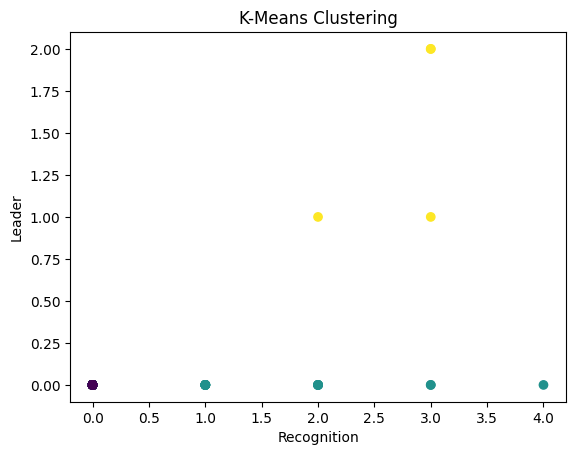

In [ ]:
# Visualize the data
plt.scatter(df['Recognition'], df['Leader'], c=df['kmeans_3'])
plt.xlabel('Recognition')
plt.ylabel('Leader')
plt.title('K-Means Clustering')
plt.show

**Optional**

Creating multiple clusters

In [ ]:
# Creating multiple clusters
for k in range(1, 9):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    df['kmeans_' + str(k)] = kmeans.labels_
df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,UsageRate,Recognition,Leader,kmeans_3,kmeans_1,kmeans_2,kmeans_4,kmeans_5,kmeans_6,kmeans_7,kmeans_8
0,0.000,0,0,0,0,1,1,0,0,0,7
1,0.633,0,0,1,0,1,0,2,5,6,3
2,0.003,0,0,0,0,1,1,0,0,0,7
3,0.000,0,0,0,0,1,1,0,0,0,7
4,0.000,0,0,0,0,1,1,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...
102,0.482,1,0,1,0,1,0,2,2,3,5
103,0.538,3,1,2,0,0,2,4,1,5,4
104,0.740,2,0,1,0,0,3,1,2,1,1
105,0.232,0,0,0,0,1,1,0,0,4,0


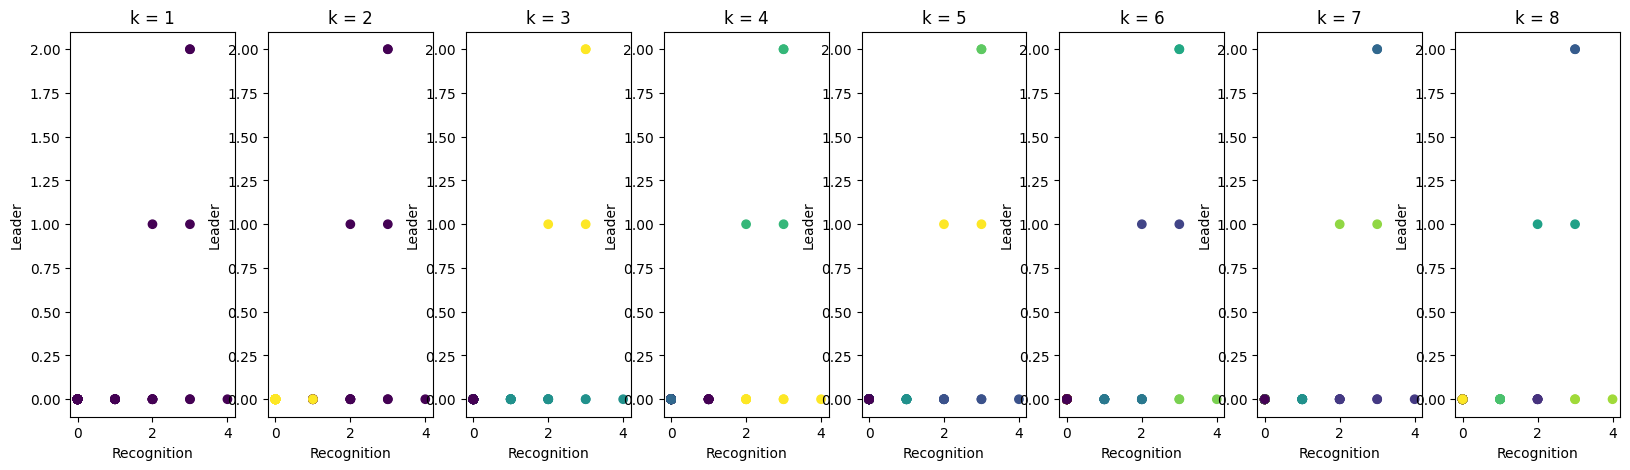

In [ ]:
# Plot all the clusters, from k = 1 to k = 8

fig, axs = plt.subplots(nrows = 1, ncols = 8, figsize = (20, 5))
for i, ax in enumerate(fig.axes, start = 1):
    axs[i - 1].scatter(df['Recognition'], df['Leader'], c = df['kmeans_' + str(i)])
    axs[i - 1].set_title('k = ' + str(i))
    axs[i - 1].set_xlabel('Recognition')
    axs[i - 1].set_ylabel('Leader')